Javier Alemán Rodríguez

# Predicción de riesgo crediticio de clientes

## Variables

Attribute1 <span style="color: green;">(Categorica)</span>: Estado de la cuenta corriente existente

Attribute2 <span style="color: blue;">(Entera)</span>: Duración (meses)

Attribute3 <span style="color: green;">(Categorica)</span>: Historial crediticio

Attribute4 <span style="color: green;">(Categorica)</span>: Propósito

Attribute5 <span style="color: blue;">(Entera)</span>: Cantidad de crédito

Attribute6 <span style="color: green;">(Categorica)</span>: Cuenta de ahorros

Attribute7 <span style="color: green;">(Categorica)</span>: Empleo actual

Attribute8 <span style="color: blue;">(Entera)</span>: Tasa de pago a plazos en porcentaje del ingreso disponible

Attribute9 <span style="color: green;">(Categorica)</span>: Estado personal y sexo (Estado civil)

Attribute10 <span style="color: green;">(Categorica)</span>: Otros deudores


Attribute11 <span style="color: blue;">(Entera)</span>: Recidencia actual

Attribute12 <span style="color: green;">(Categorica)</span>: Propiedad

Attribute13 <span style="color: blue;">(Entera)</span>: Edad (Años)

Attribute14 <span style="color: green;">(Categorica)</span>: Otros planes de pago

Attribute15 <span style="color: green;">(Categorica)</span>: Alojamiento

Attribute16 <span style="color: blue;">(Entera)</span>: Cuenta de ahorros

Attribute17 <span style="color: green;">(Categorica)</span>: Empleo

Attribute18 <span style="color: blue;">(Entera)</span>: Número de personas responsables de proporcionar mantenimiento a

Attribute19 <span style="color: yellow;">(Binaria)</span>: Teléfono

Attribute20 <span style="color: yellow;">(Binaria)</span>: Trabajor extranjero

<span style="color: red;">Variable objetivo:</span> class <span style="color: yellow;">(Binaria)</span>: 1 = Bueno, 2 = Malo

## Extracción y visualizado de datos

### Importación de librerías

In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics
from scipy import cluster

### Importación de datos

In [2]:
repository = 'https://raw.githubusercontent.com/JaviARo/Datasets/main/statlog%2Bgerman%2Bcredit%2Bdata/german.data'

german_credit_data = pd.read_csv(repository, sep=' ', header=None)

german_credit_data.columns = [
  'checking_account_status', 
  'duration', 
  'credit_history', 
  'purpose', 
  'credit_amount', 
  'saving_account',
  'present_employment_since',
  'installment_rate',
  'personal_status_and_sex',
  'other_debtors',
  'present_recidence_since',
  'property',
  'age',
  'other_installment_plans',
  'housing',
  'existing_credits',
  'job',
  'people_maintained',
  'telephone',
  'foreing_worker',
  'class'
]

german_credit_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,saving_account,present_employment_since,installment_rate,personal_status_and_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_maintained,telephone,foreing_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [3]:
for columna in german_credit_data.columns:
  num_valores_unicos = german_credit_data[columna].nunique()
  print(f'Número de valores únicos en la columna {columna}: {num_valores_unicos}')

Número de valores únicos en la columna checking_account_status: 4
Número de valores únicos en la columna duration: 33
Número de valores únicos en la columna credit_history: 5
Número de valores únicos en la columna purpose: 10
Número de valores únicos en la columna credit_amount: 921
Número de valores únicos en la columna saving_account: 5
Número de valores únicos en la columna present_employment_since: 5
Número de valores únicos en la columna installment_rate: 4
Número de valores únicos en la columna personal_status_and_sex: 4
Número de valores únicos en la columna other_debtors: 3
Número de valores únicos en la columna present_recidence_since: 4
Número de valores únicos en la columna property: 4
Número de valores únicos en la columna age: 53
Número de valores únicos en la columna other_installment_plans: 3
Número de valores únicos en la columna housing: 3
Número de valores únicos en la columna existing_credits: 4
Número de valores únicos en la columna job: 4
Número de valores únicos e

In [4]:
le = LabelEncoder()

pd.options.mode.copy_on_write = True

categorical_cols = [
  'checking_account_status', 
  'credit_history', 
  'purpose', 
  'saving_account',
  'present_employment_since',
  'personal_status_and_sex',
  'other_debtors',
  'property',
  'other_installment_plans',
  'housing',
  'job',
  'telephone',
  'foreing_worker',
]

for col in categorical_cols: 
	german_credit_data[col] = le.fit_transform(german_credit_data[col])

In [5]:
german_credit_data.head()

,checking_account_status,duration,credit_history,purpose,credit_amount,saving_account,present_employment_since,installment_rate,personal_status_and_sex,other_debtors,...,property,age,other_installment_plans,housing,existing_credits,job,people_maintained,telephone,foreing_worker,class
0,0,6,4,4,1169,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,5951,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,2096,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,7882,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,4870,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
german_credit_scaled = min_max_scaler.fit_transform(german_credit_data)
german_credit_scaled

array([[0.        , 0.02941176, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.33333333, 0.64705882, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.11764706, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 0.11764706, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.60294118, 0.5       , ..., 1.        , 0.        ,
        1.        ],
       [0.33333333, 0.60294118, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [8]:
# Reducimos la dimensionalidad de los datos (a dos dimensiones)
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(german_credit_scaled)
# Mostramos el porcentaje de varianza explicada por cada uno de los componentes seleccionados.
print(pca.explained_variance_ratio_)

# Visualizar la "importancia" de cada variable original del problema en las nuevas dimensiones
pd.DataFrame(np.matrix.transpose(pca.components_), columns=['PC-1', 'PC-2'], index=german_credit_data.columns)

[0.14651311 0.13153894]


,PC-1,PC-2
checking_account_status,-0.501551,-0.224767
duration,0.013203,0.129457
credit_history,-0.161127,-0.060298
purpose,-0.006528,0.002704
credit_amount,-0.014013,0.120007
saving_account,-0.336694,-0.030155
present_employment_since,-0.153078,0.050830
installment_rate,-0.001252,0.096612
personal_status_and_sex,-0.045361,-0.005701
other_debtors,0.056712,-0.047646


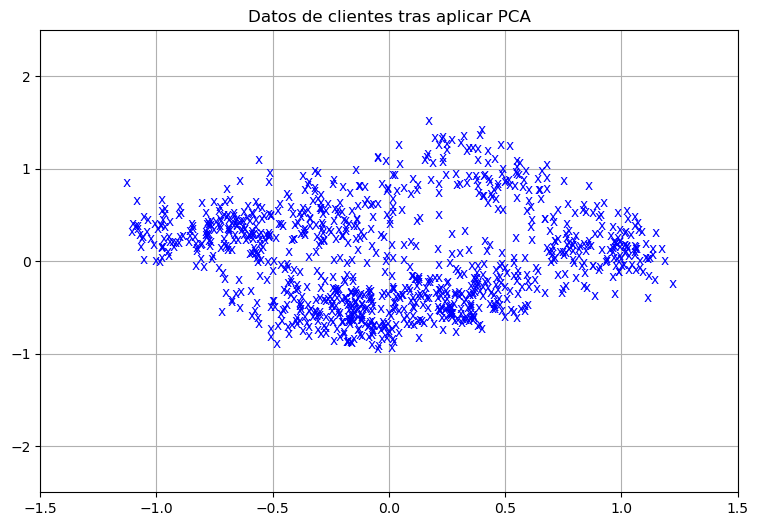

In [11]:
plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color="b")
plt.xlim(-1.5, 1.5)
plt.ylim(-2.5, 2.5)
plt.title("Datos de clientes tras aplicar PCA")
plt.grid()
plt.show()

Distancia Media	   2.01


C:\Users\Javi\AppData\Local\Temp\ipykernel_2832\91674780.py:7: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(D, method='average')


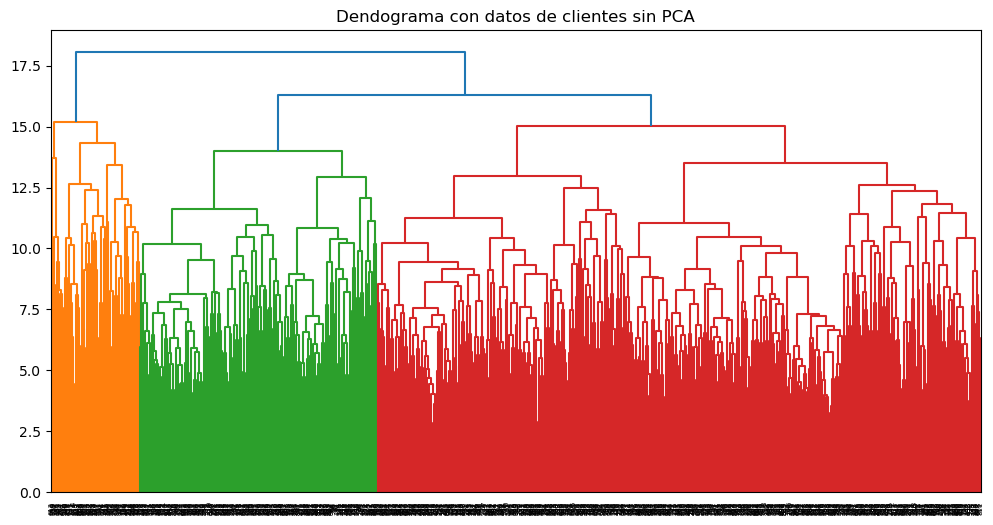

In [42]:
dist = sklearn.metrics.DistanceMetric.get_metric('euclidean')
D = dist.pairwise(german_credit_scaled)
avD = np.average(D)
print("Distancia Media\t {:6.2f}".format(avD))

plt.figure(figsize=(12, 6))
clusters = cluster.hierarchy.linkage(D, method='average')
cluster.hierarchy.dendrogram(clusters, color_threshold=16)
plt.title("Dendograma con datos de clientes sin PCA")
plt.show()

In [43]:
threshold = 16 # ad-hoc
labels = cluster.hierarchy.fcluster(clusters, threshold , criterion='distance')

# ¿Cuántos grupos hay? Contamos el número de "labels" distintas en el vector
print("Número de clusters {}".format(len(set(labels))))
labels

Número de clusters 3


array([3, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 3, 1, 2, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 1, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 1,
       3, 2, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 3, 2, 3,
       1, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 2, 1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 1,
       3, 3, 3, 3, 1, 2, 2, 3, 1, 3, 1, 3, 2, 3, 2, 1, 3, 3, 2, 2, 3, 2,
       1, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3,
       1, 3, 3, 3, 3, 1, 3, 2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 1,
       1, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 2, 3, 2, 1, 3, 1, 2, 3, 3, 3, 3, 3,

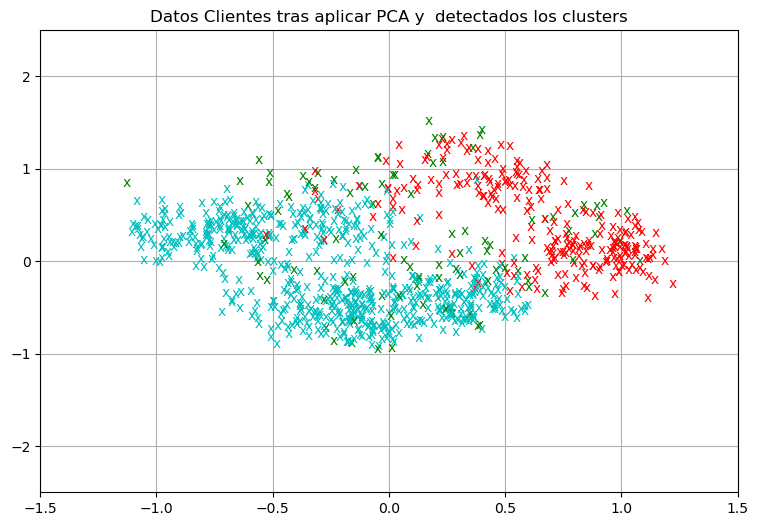

In [44]:
colores = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colores = np.hstack([colores] * 20)

plt.figure(figsize=(9, 6))
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], 'x', color=colores[labels[i]])
plt.xlim(-1.5, 1.5)
plt.ylim(-2.5, 2.5)
plt.grid()
plt.title("Datos Clientes tras aplicar PCA y  detectados los clusters")
plt.show()